In [14]:
from localization import pf
import matplotlib.pyplot as plt 
import numpy as np

map_file_path = '/home/tian/mobilerobot_ws/src/localization/map/mbs_map.pgm'
map_yaml_path = '/home/tian/mobilerobot_ws/src/localization/map/map.yaml'
particle_filter =  pf.ParticleFilter(map_file_path, map_yaml_path, 40)

[16 19]
64
43


In [15]:
def viewParticles(particle_filter):
    x = [particle_filter.samples[i].state[0] * particle_filter.map.scale + particle_filter.map.odom_in_map_scale_ref_map_origin[0] for i in range(len(particle_filter.samples))]
    y = [-1*(particle_filter.samples[i].state[1] * particle_filter.map.scale) + particle_filter.map.odom_in_map_scale_ref_map_origin[1] for i in range(len(particle_filter.samples))]
    theta = [particle_filter.samples[i].state[2] for i in range(len(particle_filter.samples))]
    # print(theta)

    plt.imshow(particle_filter.map.norm_pgm_data, cmap="gray")
    plt.plot(particle_filter.map.map_origin[0], particle_filter.map.map_origin[1], "ro", markersize = 10)
    plt.plot(particle_filter.map.odom_in_map_scale_ref_map_origin[0], particle_filter.map.odom_in_map_scale_ref_map_origin[1], "bo", markersize = 10)
    
    # robot position w.r.t. global frame
    robotPosition = np.array([particle_filter.robot_state[0], particle_filter.robot_state[1]])
    # change from real scale to map scale 
    robotPosition_in_mapScale = robotPosition*particle_filter.map.scale
    # change the reference frame from global frame to map frame
    robotPosition_in_mapScale_ref_map_frame = np.array([0.0, 0.0])
    robotPosition_in_mapScale_ref_map_frame[0] = particle_filter.map.odom_in_map_scale_ref_map_origin[0] + robotPosition_in_mapScale[0]
    robotPosition_in_mapScale_ref_map_frame[1] = particle_filter.map.odom_in_map_scale_ref_map_origin[1] - robotPosition_in_mapScale[1]
    plt.plot(robotPosition_in_mapScale_ref_map_frame[0], robotPosition_in_mapScale_ref_map_frame[1], "go", markersize = 10)
    plt.scatter(x, y)
    plt.show()

In [16]:
len(particle_filter.samples)

40

In [17]:
# particle_filter.generate_random_sample()

360


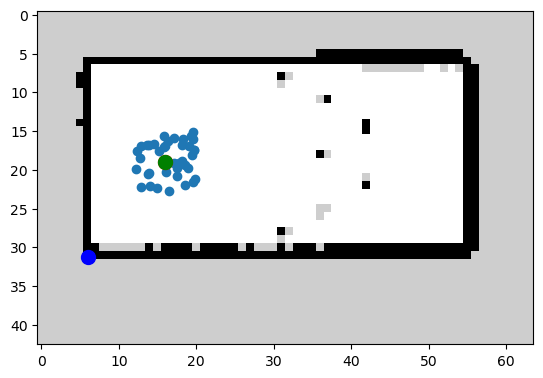

In [18]:
particle_filter.raw_lidar_data = np.array([1.0441022,1.9737152,1.9768271,1.9720703,1.9848659,1.9507539
,1.96516,1.9907565,1.3217922,1.9954339,1.997774,2.0083568
,2.0226104,2.00883,2.0492413,2.0463955,2.0473514,2.0570846
,1.967365,1.0884379,1.7761109,1.6947597,1.6368221,1.5443832
,1.4875687,1.4537829,1.3915315,1.3493814,1.298238,1.2578607
,1.2279421,1.185685,0.924517,0.89009225,0.8882448,1.0594825
,1.0429677,1.0179647,1.0003004,0.9561891,0.94606745,0.92983717
,0.92540723,0.8966364,0.8732121,0.86695427,0.8533071,0.81524104
,0.82580847,0.81055593,0.7893244,0.78176904,0.76709956,0.76276433
,0.7432666,0.7559524,0.75077516,0.71544456,0.71489054,0.68996936
,0.71716607,0.67347795,0.67358285,0.68990904,0.67814314,0.6709185
,0.66837204,0.6580537,0.6580571,0.6569991,0.6340864,0.64639384
,0.63494575,0.6293718,0.6447622,0.6304795,0.63417083,0.6392709
,0.6180501,0.6309107,0.5949809,0.6250404,0.60451937,0.6026009
,0.6209551,0.61067027,0.6134434,0.5955061,0.61817974,0.610109
,0.6311146,0.62103814,0.6173753,0.6038239,0.6052048,0.6182213
,0.6164554,0.6118458,0.6288375,0.6223886,0.59723365,0.62520915
,0.62245744,0.6432333,0.6350097,0.6355662,0.6409113,0.6385299
,0.6440043,0.6303531,0.64574045,0.64748895,0.66041267,0.6713767
,0.65038604,0.68739605,0.6708505,0.6816443,0.68988675,0.69046706
,0.70230025,0.70275795,0.71631706,0.71184313,0.7370423,0.75521135
,0.74942255,0.74726206,0.75883037,0.7465526,0.7164059,0.7339595
,0.70871466,0.6911163,0.6788949,0.6608322,0.6688166,0.63563603
,0.6378189,0.6089975,0.6071712,0.60263515,0.6142469,0.5813064
,0.57133,0.5697456,0.5705895,0.5522683,0.55161357,0.54952866
,0.5338943,0.54910004,0.5271436,0.5262144,0.5161208,0.5022031
,0.51474106,0.50842476,0.50350213,0.48737055,0.49278986,0.48427305
,0.5047445,0.4932272,0.500622,0.49738666,0.4832112,0.47107998
,0.47212568,0.46347588,0.4621127,0.4831474,0.47864604,0.47595206
,0.4784972,0.4700907,0.47042394,0.46198606,0.46915856,0.46265128
,0.47423232,0.47397476,0.49154893,0.46690977,0.46895996,0.4754284
,0.4584398,0.47325835,0.4821194,0.49397597,0.47961697,0.47097024
,0.47728378,0.48998147,0.48915306,0.49303636,0.48495948,0.46746525
,0.47529408,0.49013042,0.49850658,0.5098643,0.49576557,0.49876598
,0.50829136,0.53609186,0.53233343,0.531871,0.5336033,0.5277191
,0.54612124,0.54909897,0.5430653,0.5669476,0.55765903,0.58578086
,0.58254516,0.60243094,0.6051009,0.61236674,0.6163357,0.6205468
,0.6292784,0.63202393,0.6553644,0.64963084,0.6624519,0.68472743
,0.7081518,0.7189362,0.75681967,0.75738615,0.77832973,0.74946344
,0.73952943,0.7338852,0.75460255,0.72576624,0.69961894,0.7084836
,0.722031,0.6917803,0.69702613,0.6780435,0.6782168,0.67903036
,0.6498289,0.65587175,0.653608,0.6453359,0.6325779,0.634181
,0.6366277,0.62381095,0.64968985,0.6241356,0.6194295,0.63346523
,0.6231702,0.61243296,0.6308593,0.61688507,0.6186039,0.6200111
,0.6250687,0.6227477,0.60960007,0.61716354,0.6010326,0.6165991
,0.60598874,0.59772444,0.6208808,0.6142338,0.5952021,0.6120363
,0.6198247,0.62289155,0.63750726,0.6164046,0.62934923,0.62818086
,0.6220469,0.6498157,0.6262844,0.621869,0.63900584,0.6384111
,0.6560028,0.64168686,0.6619128,0.6455143,0.6710324,0.66380423
,0.6704806,0.67768043,0.67563766,0.6912944,0.7046595,0.712602
,0.71948063,0.70631593,0.7436496,0.73993206,0.7466788,0.7524169
,0.75564986,0.75658685,0.773051,0.8048163,0.7897187,0.81443095
,0.8348128,0.8501945,0.8528113,0.861139,0.8993151,0.90296525
,0.9165503,0.9286867,0.9580575,0.9678351,0.9917777,1.0201421
,1.056712,1.0729495,0.88455915,0.9192213,1.1717255,1.2062008
,1.2540432,1.2899852,1.3441136,1.3640598,1.43692,1.4808336
,1.5662016,1.607473,1.6756424,1.74797,1.0998836,1.9577049
,2.065063,2.0462382,2.0449858,2.0270402,2.040079,2.0125668
,2.0115182,1.9969137,1.9918587,1.9928347,1.9853024,1.9831734
,1.9759616,1.9720843,1.9675826,1.9819626,1.9659219,1.036126,]
)

particle_filter.robot_state[0] = 0.5
particle_filter.robot_state[1] = 0.61
particle_filter.robot_state[2] = 0.0
particle_filter.convert_rawLidarData_to_pointCloud()

print(len(particle_filter.raw_lidar_data))

# particle_filter.samples[0].state[0] = 0.5
# particle_filter.samples[0].state[1] = 0.61
# particle_filter.samples[0].state[2] = 0.0

particle_filter.generate_random_sample_with_known_state(particle_filter.robot_state, 0.2, 0.175)


viewParticles(particle_filter)

In [19]:
len(particle_filter.target_point_clouds)

360

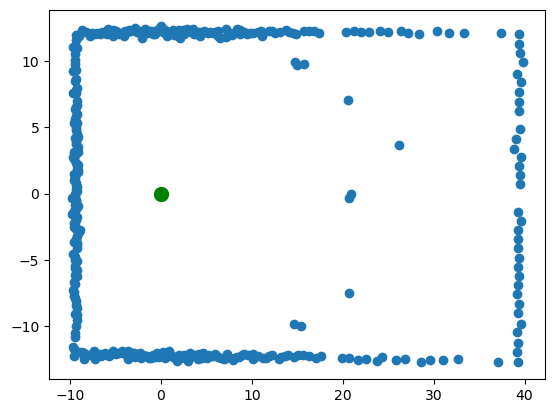

sample 0
drop out member1:  [0]
drop out member1_n:  1
drop out member2:  [260, 261, 262, 263, 264, 265, 266, 139, 267, 268, 269, 274, 275, 276, 153, 154, 155, 156, 157, 158, 57, 58, 198, 199, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 202, 203, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 200, 201, 118, 119]
drop out member2_n:  52
number of detected data 359
number of simulated data 308
Iteration 0 - Mean Distance: 1.49
Iteration 1 - Mean Distance: 0.96
Iteration 2 - Mean Distance: 0.6
Iteration 3 - Mean Distance: 0.45
Iteration 4 - Mean Distance: 0.37
Iteration 5 - Mean Distance: 0.34
Iteration 6 - Mean Distance: 0.34
Iteration 7 - Mean Distance: 0.34
Iteration 8 - Mean Distance: 0.34
t_hat:  [-0.03665867  0.02858017]
weight:  0.046483160081806134
sample 1
drop out member1:  [0]
drop out member1_n:  1
drop out member2:  [132, 144, 277, 278, 279, 280, 162, 163, 164, 165, 306, 214, 54, 312, 63, 64, 200, 201, 202, 203, 204, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93

In [20]:
particle_filter.localize()

In [21]:
particle_filter.resampling2(2)

particles norm weight:  [4.52143720e-02 4.40175436e-02 3.84718434e-02 1.38297080e-15
 2.38150404e-02 3.25255572e-02 4.61586980e-02 1.10286323e-02
 2.81563476e-02 3.08548411e-02 3.10739221e-02 2.88645730e-02
 4.51697217e-02 3.17970349e-02 2.00891698e-02 4.41633626e-02
 2.13185601e-02 9.46548329e-03 1.62632547e-02 4.94319169e-02
 7.52831590e-03 6.37214791e-03 2.01207787e-02 1.22379277e-02
 1.47313490e-02 2.47946629e-02 1.94899313e-02 2.03692596e-02
 3.38413452e-02 2.49130975e-02 4.32091501e-02 4.86179974e-03
 2.95460564e-02 1.84536600e-15 4.04390407e-02 1.97948871e-02
 2.29904528e-02 9.25706775e-03 3.22495362e-02 1.53733187e-02]
total particles norm weight:  1.0000000000000002
39


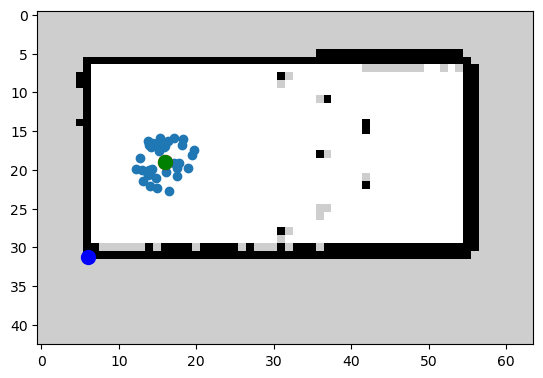

In [22]:
viewParticles(particle_filter)

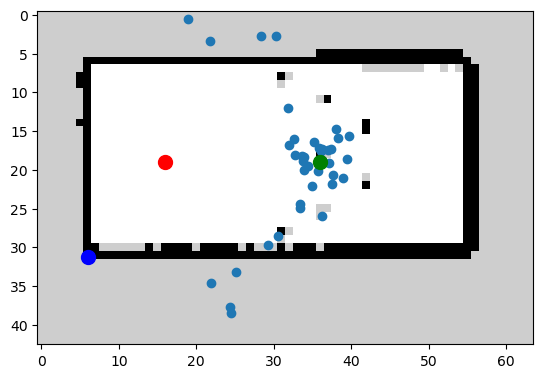

In [23]:
particle_filter.update_state(np.array([1, 0, 0]))
viewParticles(particle_filter)

particle_filter.raw_lidar_data = np.array([0.53992695,0.5325592,1.4745402,1.4650301,1.4709898,1.4727886
,1.4779748,1.4946123,1.4951512,1.512958,1.4965644,1.489427
,0.82943124,0.83121794,1.5295783,1.5236343,1.5426153,1.5377923
,1.5499393,1.5482777,1.5532907,1.5647845,1.5889769,1.5535301
,1.4909053,1.4286579,1.3963287,1.3531,1.3050123,1.2433025
,1.2059631,1.1754203,1.1547683,0.6341469,0.6472742,1.0723083
,1.0297893,1.0177921,0.9925105,0.9881209,0.9545835,0.938212
,0.9076647,0.89938134,0.85714054,0.85654557,0.83585274,0.84129757
,0.80687046,0.79130626,0.7974406,0.7849818,0.78930897,0.75182027
,0.74135584,0.7380236,0.7287583,0.73154557,0.6943898,0.5676638
,0.5533852,0.55668783,0.5742921,0.5412506,0.68836755,0.6547666
,0.6935073,0.6549654,0.66409224,0.65619516,0.6371943,0.634181
,0.63706344,0.63300806,0.6409039,0.62816894,0.6364367,0.6273274
,0.60776633,0.6227223,0.6312015,0.61197644,0.6071366,0.611265
,0.61001366,0.6035952,0.61315614,0.6118881,0.6040155,0.60999745
,0.617907,0.61148804,0.62025523,0.6194128,0.62447625,0.6304915
,0.61939186,0.6263276,0.6205225,0.63071525,0.6058816,0.6383333
,0.63537335,0.62744796,0.61622953,0.62594926,0.62643033,0.6640546
,0.6535586,0.65723634,0.6517408,0.64670247,0.6555055,0.6594251
,0.68702555,0.67389804,0.6929832,0.6784056,0.68681294,0.70428395
,0.7173273,0.7223249,0.72048444,0.72121835,0.73314303,0.7569464
,0.76490915,0.7715671,0.77943766,0.7801081,0.7993872,0.80810744
,0.8219764,0.83886075,0.8519654,0.8713486,0.88787323,0.8836013
,0.9065326,0.9558916,0.9565726,0.9823711,1.0029289,1.0253338
,1.0602765,1.079494,1.0934229,1.1120455,1.1468745,1.1211356
,1.1155508,1.0815449,1.085993,1.0857918,1.0792463,1.0673175
,1.0607926,1.0395606,1.0476357,1.0427465,1.0265589,1.0260168
,1.0204722,1.0097197,1.0063677,1.0191146,0.98253536,0.9886506
,1.0071129,0.9945022,0.9690754,0.9703346,0.99526346,0.9827751
,0.9830357,0.97542864,0.9725668,0.9684575,0.97976905,0.9751819
,0.96506155,0.9692792,0.9772427,0.9680489,0.98911947,0.9560271
,0.9747205,0.98464674,0.9727769,0.9829639,1.0056579,0.9949092
,1.0008488,0.9894544,0.9909961,1.0047742,1.0220691,1.0021
,1.0164067,1.0316314,1.0421873,1.0454694,1.0343077,1.0649627
,1.0631652,1.0704395,1.0831821,1.0920404,1.0935875,1.1220092
,1.1362522,1.1453735,1.1366739,1.1080123,1.0572978,1.0620894
,1.0015272,1.015488,0.96755445,0.9642943,0.9456748,0.90824956
,0.8960688,0.87723404,0.88115484,0.8544173,0.84672505,0.8221102
,0.82023895,0.79854923,0.787637,0.7649904,0.7636784,0.7647319
,0.74750787,0.7462738,0.7279743,0.7358325,0.7034789,0.69100255
,0.720114,0.68194515,0.6776246,0.69025165,0.6937064,0.6781066
,0.66802186,0.6621173,0.6556273,0.65442204,0.63854194,0.63840556
,0.6324154,0.6374493,0.6222829,0.62487775,0.6311144,0.6207775
,0.6162895,0.623618,0.6150872,0.602277,0.6021186,0.60980785
,0.60375726,0.608876,0.59427947,0.6051362,0.60477716,0.60515916
,0.62739253,0.60231215,0.6265719,0.60934305,0.60609376,0.61143917
,0.63442266,0.63573617,0.6343666,0.63295543,0.635264,0.6248661
,0.63296795,0.63694704,0.6246217,0.63270915,0.644368,0.6250024
,0.6568494,0.65311426,0.64181477,0.66053534,0.6579408,0.68239844
,0.6719806,0.668597,0.56778574,0.5528448,0.55274284,0.54327
,0.5734908,0.70835847,0.7198238,0.7353615,0.7509757,0.73726344
,0.7630481,0.76613957,0.7853651,0.79087317,0.79366165,0.81521744
,0.83156556,0.8421869,0.8411264,0.86643016,0.88817626,0.91654783
,0.90364575,0.93009216,0.94856894,0.975632,0.999875,1.0272058
,1.0775592,0.64669085,0.6498383,1.1463834,1.1836878,1.214126
,1.2392399,1.2881333,1.3283752,1.3626274,1.4281437,1.4922383
,1.5626819,1.5887531,1.5788494,1.5616176,1.5723646,1.5296029
,1.5482256,1.544199,1.5086733,1.5099888,1.5219039,0.82065064
,1.4899483,1.5042297,1.489339,1.480798,1.4708782,1.4707144
,1.4884984,1.4679503,1.4633012,1.4936706,1.4751863,0.5127369])
particle_filter.convert_rawLidarData_to_pointCloud()

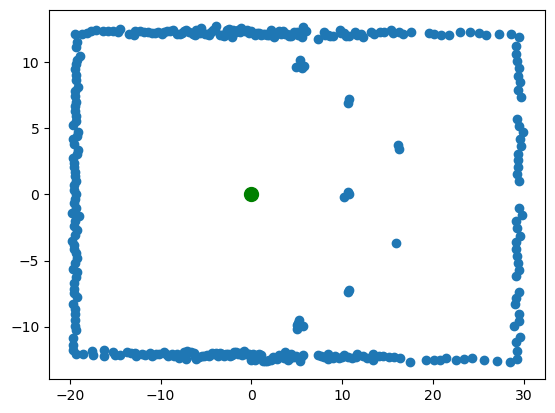

sample 0
drop out member1:  [0]
drop out member1_n:  1
drop out member2:  [192, 193, 194, 163, 164, 195, 171, 172, 109, 110, 111, 112, 173, 174, 237, 121, 122, 158]
drop out member2_n:  18
number of detected data 359
number of simulated data 342
Iteration 0 - Mean Distance: 4.02
Iteration 1 - Mean Distance: 3.15
Iteration 2 - Mean Distance: 2.63
Iteration 3 - Mean Distance: 2.33
Iteration 4 - Mean Distance: 2.22
Iteration 5 - Mean Distance: 2.14
Iteration 6 - Mean Distance: 2.11
Iteration 7 - Mean Distance: 2.07
Iteration 8 - Mean Distance: 2.02
Iteration 9 - Mean Distance: 1.74
t_hat:  [1.21864068 0.01666658]
weight:  1.218754642064221
sample 1
drop out member1:  [0]
drop out member1_n:  1
drop out member2:  [256, 257, 258, 259, 260, 197, 198, 229, 115, 116, 117, 243, 244, 126]
drop out member2_n:  14
number of detected data 359
number of simulated data 346
Iteration 0 - Mean Distance: 3.08
Iteration 1 - Mean Distance: 3.18
Iteration 2 - Mean Distance: 3.29
Iteration 3 - Mean Distance

In [24]:
particle_filter.localize()

particles norm weight:  [1.00105111e-01 1.36652120e-01 7.87295297e-03 4.46890175e-02
 5.69520682e-02 1.34549447e-02 1.44889905e-02 8.11892251e-02
 1.49207191e-02 2.87390513e-02 4.91942334e-03 3.09231321e-02
 3.97666007e-02 6.48900179e-03 5.57890093e-02 1.94587757e-02
 1.40261174e-02 5.72989518e-03 5.63459060e-02 9.52328478e-03
 8.62851853e-03 1.75627055e-03 2.07960996e-02 5.07369024e-02
 1.42286504e-02 7.50526604e-03 5.76284544e-02 8.55463998e-03
 1.08826063e-02 9.86419330e-04 4.22477950e-02 4.51831642e-03
 4.08663489e-05 1.02004979e-03 1.96312664e-03 1.42159806e-03
 1.22184012e-02 1.50395434e-16 1.28306717e-02]
total particles norm weight:  0.9999999999999999
39


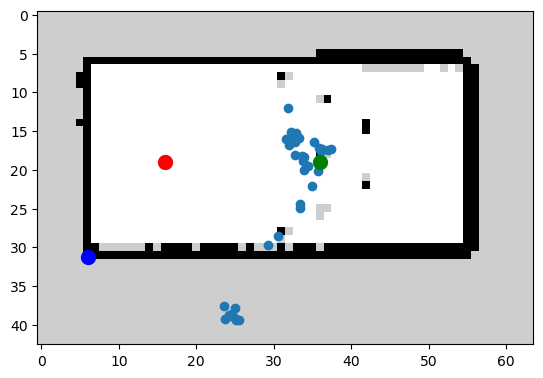

In [25]:
particle_filter.resampling2(2)
viewParticles(particle_filter)

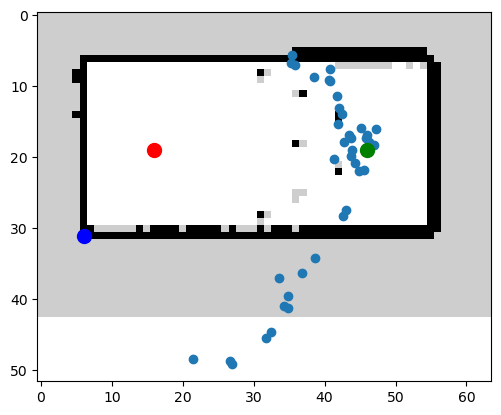

In [26]:
particle_filter.update_state(np.array([0.5, 0, 0]))
viewParticles(particle_filter)
